### This notebook trains a yolo detection model to recognize beetles and scale bars in images

In [1]:
# import pip
# pip.main(["install", "ultralytics"])

In [8]:
import os, glob, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import cv2
import wget
%matplotlib inline

In [2]:
#access GPU if available
use_cuda = torch.cuda.is_available()
DEVICE   = torch.device("cuda:0" if use_cuda else "cpu")
print("Device: ", DEVICE)

if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

Device:  cuda:0
__CUDNN VERSION: 90100
__Number CUDA Devices: 8
__CUDA Device Name: NVIDIA RTX A6000
__CUDA Device Total Memory [GB]: 51.033931776


In [3]:
#helper functions
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [16]:
#define path to yaml file containing info about our dataset
YAML     = '/home/ramirez.528/2018-NEON-beetles-processing/detection/data/beetle_detection.yaml'
# EPOCHS   = 50 #213 does well
EPOCHS = 100

In [6]:
#download the pretrained yolo_v8m weights
yolo_8m = wget.download('https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8m.pt')
yolo_8m

'yolov8m (2).pt'

In [17]:
# Load a pretrained model
model = YOLO('yolov8m.pt')

# Train the model
outputs_folder = '/home/ramirez.528/2018-NEON-beetles-processing/detection/runs'
save_name = 'beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.2' ##USE THIS ONE
results = model.train(data=YAML, 
                      epochs=EPOCHS, 
                      batch=4,
                      device=DEVICE,
                      val=True,
                      optimizer='auto',
                      verbose=True,
                      project=outputs_folder,
                      name = save_name,
                      shear=10.0,
                      scale=0.5, 
                      translate=0.1,
                      fliplr = 0.2,
                      flipud = 0.2
                     )



engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/ramirez.528/2018-NEON-beetles-processing/detection/data/beetle_detection.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=/home/ramirez.528/2018-NEON-beetles-processing/detection/runs, name=beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning /home/ramirez.528/2018-NEON-beetles-processing/detection/data/labels/train.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
val: Scanning /home/ramirez.528/2018-NEON-beetles-processing/detection/data/labels/train.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]


Plotting labels to /home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.27G      1.995      3.589      1.751          1        640: 100%|██████████| 8/8 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.98it/s]

                   all         29        479      0.588      0.666      0.622      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.2G      1.573       1.51      1.453         80        640: 100%|██████████| 8/8 [00:00<00:00, 13.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.56it/s]

                   all         29        479      0.893      0.751      0.862      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.21G      1.904      2.066      1.467          3        640: 100%|██████████| 8/8 [00:00<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.27it/s]


                   all         29        479      0.858      0.691      0.781      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.23G      1.323      5.075       1.33          2        640: 100%|██████████| 8/8 [00:00<00:00, 14.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.79it/s]


                   all         29        479      0.765      0.963      0.929      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.25G      1.273       1.21      1.133         72        640: 100%|██████████| 8/8 [00:00<00:00, 14.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.03it/s]

                   all         29        479      0.857      0.948      0.965       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.21G      1.291     0.9403      1.193         27        640: 100%|██████████| 8/8 [00:00<00:00, 14.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.04it/s]

                   all         29        479      0.922      0.976      0.984      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.18G      1.572      1.579        1.2         43        640: 100%|██████████| 8/8 [00:00<00:00, 15.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.36it/s]


                   all         29        479      0.458      0.468      0.414      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.23G      1.497      2.063      1.176          4        640: 100%|██████████| 8/8 [00:00<00:00, 14.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.58it/s]

                   all         29        479      0.836      0.484      0.332      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.19G      1.385      1.125      1.104         51        640: 100%|██████████| 8/8 [00:00<00:00, 15.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.82it/s]

                   all         29        479      0.864      0.373      0.408      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.2G      1.632      1.429      1.433         61        640: 100%|██████████| 8/8 [00:00<00:00, 14.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.48it/s]

                   all         29        479      0.864      0.373      0.408      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.16G      1.568      1.483      1.413         13        640: 100%|██████████| 8/8 [00:00<00:00, 14.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.71it/s]

                   all         29        479      0.444      0.326      0.385      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.24G      1.278     0.9891      1.267         14        640: 100%|██████████| 8/8 [00:00<00:00, 15.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.07it/s]

                   all         29        479      0.444      0.326      0.385      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.22G      1.351     0.9771      1.281         34        640: 100%|██████████| 8/8 [00:00<00:00, 15.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.68it/s]

                   all         29        479      0.307      0.351      0.316      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.19G      1.567      1.105      1.311         11        640: 100%|██████████| 8/8 [00:00<00:00, 15.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.03it/s]

                   all         29        479      0.307      0.351      0.316      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.14G      1.476      1.291        1.4         31        640: 100%|██████████| 8/8 [00:00<00:00, 14.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.17it/s]

                   all         29        479      0.739      0.723      0.796      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.23G      1.443      1.258      1.368          7        640: 100%|██████████| 8/8 [00:00<00:00, 15.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.82it/s]

                   all         29        479      0.739      0.723      0.796      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.16G      1.389      1.235      1.329         58        640: 100%|██████████| 8/8 [00:00<00:00, 15.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.55it/s]

                   all         29        479     0.0144     0.0595    0.00676    0.00299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.21G      1.274      0.915      1.198         30        640: 100%|██████████| 8/8 [00:00<00:00, 15.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.08it/s]

                   all         29        479     0.0144     0.0595    0.00676    0.00299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.19G       1.21       1.68       1.25          4        640: 100%|██████████| 8/8 [00:00<00:00, 15.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.92it/s]

                   all         29        479     0.0889      0.182     0.0895     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.22G      1.282      1.104      1.219         22        640: 100%|██████████| 8/8 [00:00<00:00, 16.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.23it/s]

                   all         29        479     0.0889      0.182     0.0895     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.2G      1.284     0.9423      1.183         29        640: 100%|██████████| 8/8 [00:00<00:00, 15.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.57it/s]

                   all         29        479      0.113      0.595      0.113     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.16G      1.317     0.7972      1.239         41        640: 100%|██████████| 8/8 [00:00<00:00, 15.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.52it/s]

                   all         29        479      0.113      0.595      0.113     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.19G      1.271     0.7992      1.238         24        640: 100%|██████████| 8/8 [00:00<00:00, 15.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.01it/s]

                   all         29        479      0.486      0.881      0.518      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.22G      1.361     0.8057      1.286         40        640: 100%|██████████| 8/8 [00:00<00:00, 15.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.17it/s]

                   all         29        479      0.486      0.881      0.518      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.19G      1.264     0.8505      1.274         17        640: 100%|██████████| 8/8 [00:00<00:00, 15.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.93it/s]

                   all         29        479      0.789      0.822      0.833      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.19G      1.214     0.7881      1.222         56        640: 100%|██████████| 8/8 [00:00<00:00, 15.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.94it/s]

                   all         29        479      0.789      0.822      0.833      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.2G      1.243     0.7011        1.2         28        640: 100%|██████████| 8/8 [00:00<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.53it/s]

                   all         29        479      0.809      0.961      0.945      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.17G      1.334     0.7418      1.275         34        640: 100%|██████████| 8/8 [00:00<00:00, 18.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.15it/s]

                   all         29        479      0.809      0.961      0.945      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.19G      1.234     0.7107      1.163         21        640: 100%|██████████| 8/8 [00:00<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.70it/s]

                   all         29        479      0.885      0.944       0.97      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.19G      1.381     0.7222      1.211         78        640: 100%|██████████| 8/8 [00:00<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.78it/s]

                   all         29        479      0.885      0.944       0.97      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.16G      1.193     0.6781      1.205         36        640: 100%|██████████| 8/8 [00:00<00:00, 17.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.10it/s]

                   all         29        479      0.862      0.923      0.949       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.17G      1.168     0.7307      1.214         22        640: 100%|██████████| 8/8 [00:00<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.36it/s]

                   all         29        479      0.862      0.923      0.949       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.16G      1.189     0.7942      1.249         33        640: 100%|██████████| 8/8 [00:00<00:00, 17.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.93it/s]

                   all         29        479      0.861      0.963      0.986      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.15G      1.219     0.7292      1.217         14        640: 100%|██████████| 8/8 [00:00<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.25it/s]

                   all         29        479      0.861      0.963      0.986      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.19G      1.097     0.6513      1.097         62        640: 100%|██████████| 8/8 [00:00<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.32it/s]

                   all         29        479      0.969      0.984      0.992      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.21G      1.114     0.6332      1.107         32        640: 100%|██████████| 8/8 [00:00<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.83it/s]

                   all         29        479      0.969      0.984      0.992      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.2G      1.141     0.6617      1.207         36        640: 100%|██████████| 8/8 [00:00<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.42it/s]

                   all         29        479      0.955      0.977      0.986      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.22G      1.121     0.6496      1.222          7        640: 100%|██████████| 8/8 [00:00<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.84it/s]

                   all         29        479      0.955      0.977      0.986      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.17G      1.227      0.658      1.234         24        640: 100%|██████████| 8/8 [00:00<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.18it/s]

                   all         29        479      0.988      0.992      0.992      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.18G      1.167     0.6772      1.155         80        640: 100%|██████████| 8/8 [00:00<00:00, 17.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.24it/s]

                   all         29        479      0.988      0.992      0.992      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.19G      1.146     0.6676      1.181         12        640: 100%|██████████| 8/8 [00:00<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.03it/s]

                   all         29        479      0.979      0.986      0.992      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.18G      1.201     0.6165      1.151         66        640: 100%|██████████| 8/8 [00:00<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.86it/s]

                   all         29        479      0.979      0.986      0.992      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.19G      1.087     0.9057      1.243          2        640: 100%|██████████| 8/8 [00:00<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.89it/s]

                   all         29        479      0.988      0.996      0.993      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.22G      1.076     0.5743      1.121         55        640: 100%|██████████| 8/8 [00:00<00:00, 16.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.47it/s]

                   all         29        479      0.988      0.996      0.993      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.16G      1.132     0.6109      1.134         18        640: 100%|██████████| 8/8 [00:00<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.91it/s]

                   all         29        479      0.958      0.984      0.976      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.17G      1.143     0.5836      1.163         31        640: 100%|██████████| 8/8 [00:00<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.93it/s]

                   all         29        479      0.958      0.984      0.976      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.16G       1.08     0.5659      1.146         34        640: 100%|██████████| 8/8 [00:00<00:00, 17.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.08it/s]

                   all         29        479       0.99      0.998      0.992      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.18G      1.115     0.5499      1.115         47        640: 100%|██████████| 8/8 [00:00<00:00, 16.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.48it/s]

                   all         29        479       0.99      0.998      0.992      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.23G      1.147     0.5423      1.107         43        640: 100%|██████████| 8/8 [00:00<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.50it/s]

                   all         29        479      0.991      0.996      0.993      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.18G      1.176     0.5944       1.19         30        640: 100%|██████████| 8/8 [00:00<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.73it/s]

                   all         29        479      0.991      0.996      0.993      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.16G      1.208     0.6113       1.16         31        640: 100%|██████████| 8/8 [00:00<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.73it/s]

                   all         29        479      0.991      0.997      0.993      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.19G      1.212     0.5849      1.169         34        640: 100%|██████████| 8/8 [00:00<00:00, 17.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.21it/s]

                   all         29        479      0.991      0.997      0.993      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.18G      1.035     0.5349      1.079         17        640: 100%|██████████| 8/8 [00:00<00:00, 16.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.23it/s]

                   all         29        479      0.991      0.998      0.993      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.19G      1.073     0.5561      1.122          8        640: 100%|██████████| 8/8 [00:00<00:00, 17.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.10it/s]

                   all         29        479      0.991      0.998      0.993      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.15G      1.153     0.5769      1.174         56        640: 100%|██████████| 8/8 [00:00<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.99it/s]

                   all         29        479      0.989      0.998      0.994      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.19G      1.083     0.5367      1.156         39        640: 100%|██████████| 8/8 [00:00<00:00, 16.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.56it/s]

                   all         29        479      0.989      0.998      0.994      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.22G      1.058     0.5671      1.129          5        640: 100%|██████████| 8/8 [00:00<00:00, 17.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.01it/s]

                   all         29        479       0.99          1      0.995      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.2G      1.074     0.5198      1.087          9        640: 100%|██████████| 8/8 [00:00<00:00, 16.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.48it/s]

                   all         29        479       0.99          1      0.995      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.19G      1.031     0.5321      1.083         27        640: 100%|██████████| 8/8 [00:00<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.51it/s]

                   all         29        479      0.988      0.998      0.995      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.2G      1.091     0.5208      1.102         23        640: 100%|██████████| 8/8 [00:00<00:00, 16.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.62it/s]

                   all         29        479      0.988      0.998      0.995      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.22G      1.113     0.6113      1.189         41        640: 100%|██████████| 8/8 [00:00<00:00, 17.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.35it/s]

                   all         29        479      0.991      0.998      0.995      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.18G      1.019     0.5043       1.08         33        640: 100%|██████████| 8/8 [00:00<00:00, 16.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.56it/s]

                   all         29        479      0.991      0.998      0.995      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.2G      1.053     0.5177      1.111         19        640: 100%|██████████| 8/8 [00:00<00:00, 17.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.17it/s]

                   all         29        479      0.992      0.999      0.995      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.19G      1.181     0.7567      1.242          4        640: 100%|██████████| 8/8 [00:00<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.06it/s]

                   all         29        479      0.992      0.999      0.995      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.15G      1.099     0.5693      1.147          4        640: 100%|██████████| 8/8 [00:00<00:00, 16.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 23.58it/s]

                   all         29        479       0.99          1      0.995      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.24G      1.068     0.4974      1.091         40        640: 100%|██████████| 8/8 [00:00<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.40it/s]

                   all         29        479       0.99          1      0.995      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.17G      1.095     0.5049      1.121         25        640: 100%|██████████| 8/8 [00:00<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.68it/s]

                   all         29        479      0.993          1      0.994      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.16G      1.093     0.5308      1.152         15        640: 100%|██████████| 8/8 [00:00<00:00, 18.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.84it/s]

                   all         29        479      0.993          1      0.994      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.18G      1.069     0.4996      1.127         27        640: 100%|██████████| 8/8 [00:00<00:00, 17.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.81it/s]

                   all         29        479      0.995      0.999      0.994      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.21G     0.9983     0.5376      1.109         10        640: 100%|██████████| 8/8 [00:00<00:00, 17.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.27it/s]

                   all         29        479      0.995      0.999      0.994      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.19G      1.054     0.5269      1.123         88        640: 100%|██████████| 8/8 [00:00<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.94it/s]

                   all         29        479      0.993          1      0.994      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.19G      1.098     0.4741      1.072         27        640: 100%|██████████| 8/8 [00:00<00:00, 17.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.63it/s]

                   all         29        479      0.993          1      0.994      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.16G      1.283     0.5893      1.303          3        640: 100%|██████████| 8/8 [00:00<00:00, 16.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.80it/s]

                   all         29        479      0.995          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.22G     0.9966      0.499      1.125         18        640: 100%|██████████| 8/8 [00:00<00:00, 17.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.63it/s]

                   all         29        479      0.995          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.17G      1.085     0.4948      1.133         25        640: 100%|██████████| 8/8 [00:00<00:00, 15.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.40it/s]

                   all         29        479      0.994      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.15G      1.031     0.4707      1.055         26        640: 100%|██████████| 8/8 [00:00<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.50it/s]

                   all         29        479      0.994      0.999      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.15G      1.014     0.4841      1.111         15        640: 100%|██████████| 8/8 [00:00<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.21it/s]

                   all         29        479      0.994      0.999      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.21G     0.9915     0.4656      1.068         15        640: 100%|██████████| 8/8 [00:00<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.84it/s]

                   all         29        479      0.994      0.999      0.995      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.21G      1.053     0.5107      1.114         17        640: 100%|██████████| 8/8 [00:00<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 24.92it/s]

                   all         29        479      0.995          1      0.995      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.2G      1.099     0.5195      1.116         22        640: 100%|██████████| 8/8 [00:00<00:00, 18.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.91it/s]


                   all         29        479      0.995          1      0.995      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.16G       1.01     0.5196      1.146          7        640: 100%|██████████| 8/8 [00:00<00:00, 16.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.29it/s]

                   all         29        479      0.995      0.999      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.21G      1.036     0.4707      1.093         24        640: 100%|██████████| 8/8 [00:00<00:00, 17.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.04it/s]

                   all         29        479      0.995      0.999      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.2G      1.036     0.4662      1.062         45        640: 100%|██████████| 8/8 [00:00<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.02it/s]

                   all         29        479      0.992      0.999      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.15G      1.002     0.4823      1.098          8        640: 100%|██████████| 8/8 [00:00<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.99it/s]


                   all         29        479      0.992      0.999      0.995      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.15G      1.099     0.5041       1.17         17        640: 100%|██████████| 8/8 [00:00<00:00, 16.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.68it/s]

                   all         29        479       0.99      0.999      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.19G     0.9791     0.4465      1.028         28        640: 100%|██████████| 8/8 [00:00<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.52it/s]

                   all         29        479       0.99      0.999      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.18G      1.026     0.4509      1.101         48        640: 100%|██████████| 8/8 [00:00<00:00, 17.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.44it/s]

                   all         29        479      0.992      0.998      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.14G       1.03     0.4699      1.134         11        640: 100%|██████████| 8/8 [00:00<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.43it/s]

                   all         29        479      0.992      0.998      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.15G      1.093      0.504      1.139         43        640: 100%|██████████| 8/8 [00:00<00:00, 17.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.30it/s]

                   all         29        479      0.992      0.999      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.19G     0.9624     0.4616      1.069         29        640: 100%|██████████| 8/8 [00:00<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 28.10it/s]


                   all         29        479      0.992      0.999      0.995      0.728
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.13G      0.969     0.4651       1.05          2        640: 100%|██████████| 8/8 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.83it/s]

                   all         29        479      0.992      0.999      0.995      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.15G      1.003     0.5261      1.136          2        640: 100%|██████████| 8/8 [00:00<00:00, 16.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.70it/s]

                   all         29        479      0.992      0.999      0.995      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.15G      1.012     0.5055      1.096          5        640: 100%|██████████| 8/8 [00:00<00:00, 16.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.40it/s]

                   all         29        479      0.995      0.998      0.995      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.17G     0.9351     0.4267      1.056         35        640: 100%|██████████| 8/8 [00:00<00:00, 16.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.21it/s]

                   all         29        479      0.995      0.998      0.995      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.17G     0.9627     0.4289      1.064         37        640: 100%|██████████| 8/8 [00:00<00:00, 16.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.37it/s]

                   all         29        479      0.993      0.997      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.19G     0.9922     0.5072      1.091         46        640: 100%|██████████| 8/8 [00:00<00:00, 17.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.90it/s]

                   all         29        479      0.993      0.997      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.18G      1.061     0.4799      1.186          2        640: 100%|██████████| 8/8 [00:00<00:00, 16.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.01it/s]

                   all         29        479      0.993      0.997      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.18G      1.061     0.5474      1.061         12        640: 100%|██████████| 8/8 [00:00<00:00, 17.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 25.85it/s]

                   all         29        479      0.993      0.997      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.13G      1.007     0.5062      1.043          2        640: 100%|██████████| 8/8 [00:00<00:00, 16.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 27.43it/s]

                   all         29        479      0.992      0.997      0.995      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.15G     0.9701     0.4374       1.05         11        640: 100%|██████████| 8/8 [00:00<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 26.81it/s]

                   all         29        479      0.992      0.997      0.995      0.669



100 epochs completed in 0.061 hours.
Optimizer stripped from /home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214/weights/last.pt, 52.0MB
Optimizer stripped from /home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214/weights/best.pt, 52.0MB

Validating /home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.14 torch-2.4.0+cu121 CUDA:0 (NVIDIA RTX A6000, 48670MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]


                   all         29        479      0.992      0.998      0.995      0.741
                beetle         29        450      0.991      0.997      0.995      0.714
             scale_bar         29         29      0.992          1      0.995      0.767
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214


In [18]:
#get model metrics
ckpt = '/home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.212/weights/best.pt'
ckpt = '/home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.213/weights/best.pt' #works ok! (not tested on tiny beetles)
ckpt = '/home/ramirez.528/2018-NEON-beetles-processing/detection/runs/beetles_29_train_images_yolo_8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.2_flipud_0.214/weights/best.pt'

model = YOLO(ckpt)
metrics = model.val()
metrics.box.maps   # a list contains map50-95(B) of each category

Ultralytics YOLOv8.2.77 🚀 Python-3.10.14 torch-2.4.0+cu121 CUDA:0 (NVIDIA RTX A6000, 48670MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home/ramirez.528/2018-NEON-beetles-processing/detection/data/labels/train.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]


                   all         29        479      0.992      0.998      0.995      0.743
                beetle         29        450      0.991      0.997      0.995      0.714
             scale_bar         29         29      0.992          1      0.995      0.771
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val4


array([    0.71421,     0.77145])

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


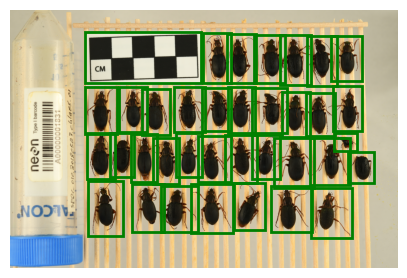

In [41]:
#predict & visualize results
image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/A00000001831.jpg' #214 weights work well! (medium beetles)
# image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/STER_027.E.20180726.POESCI.01(10).jpg' #works well! (small beetles)
# image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/YELL_011.20180809.CYMCRI.01.jpg' #works well! (small beetles)
# image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/MLBS_008.S.20180522.CARGOR(18).jpg' #large beetles (works ok - thinks numbers are small beetles)
# image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/RMNP_007.S.20180723.CALADV.01(23).jpg' #works well (small beetles!)
# image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/A00000095384.jpg' #TINY beetle - works well!
# image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/A00000051600.jpg' #medium beetles #works well
image_path = '/home/ramirez.528/2018-NEON-beetles/group_images/A00000001831.jpg'

image = cv2.imread(image_path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model.predict(image_path, 
                         verbose=False)
r = results[0]

bboxes_labels = r.boxes.cls
bboxes_xyxy = r.boxes.xyxy
print(bboxes_labels)

# visualize all the bboxes - 800
i=3
plt.figure(figsize=(5, 5))
plt.imshow(image)
for box in bboxes_xyxy:
    input_box = np.array(box.tolist())
    show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [40]:
for box in bboxes_xyxy:
    input_box = np.array(box.tolist())
    print(input_box)

[       1082      317.37      2736.8      1059.2]
[     1895.2      1144.6      2304.9        1797]
[     3795.6      1850.3      4361.1      2565.3]
[     1118.5      2455.7      1630.2      3250.9]
[     1750.2      2502.8      2213.6      3200.7]
[     2605.8      2506.3      3203.6      3209.7]
[     4260.9      373.77      4700.4      1098.7]
[     2706.5      1816.4      3172.4      2477.9]
[     4312.3      1837.8      4890.8      2516.7]
[     4256.4      1193.8      4673.4      1820.3]
[       2391      1764.7        2758        2408]
[     2047.6      1843.3      2431.6      2500.7]
[     3884.8      360.98      4322.9      1080.2]
[       1111      1776.2      1504.4      2427.9]
[     4858.8      2045.3      5229.1      2484.9]
[     3902.6        1180      4311.6      1824.7]
[       2168      2539.5      2697.7      3192.9]
[     3135.4      1109.2        3526      1772.5]
[     4640.6      1100.3      5060.1      1749.9]
[       3504      360.19      3956.8      1051.7]
